# CS3033/CS6405 - Data Mining - Second Assignment

### Submission

This assignment is **due on 15/04/22 at 23:59**. You should submit a single .ipnyb file with your python code and analysis electronically via Canvas.
Please note that this assignment will account for 25 Marks of your module grade.

### Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism, and agree to the requirements set out thereby in relation to plagiarism and referencing. I confirm that I have referenced and acknowledged properly all sources used in the preparation of this assignment.
I declare that this assignment is entirely my own work based on my personal study. I further declare that I have not engaged the services of another to either assist me in, or complete this assignment”</font>

### Objective

The Boolean satisfiability (SAT) problem consists in determining whether a Boolean formula F is satisfiable or not. F is represented by a pair (X, C), where X is a set of Boolean variables and C is a set of clauses in Conjunctive Normal Form (CNF). Each clause is a disjunction of literals (a variable or its negation). This problem is one of the most widely studied combinatorial problems in computer science. It is the classic NP-complete problem. Over the past number of decades, a significant amount of research work has focused on solving SAT problems with both complete and incomplete solvers.

One of the most successful approaches is an algorithm portfolio, where a solver is selected among a set of candidates depending on the problem type. Your task is to create a classifier that takes as input the SAT instance's features and identifies the class.

In this project, we represent SAT problems with a vector of 327 features with general information about the problem, e.g., number of variables, number of clauses, the fraction of horn clauses in the problem, etc. There is no need to understand the features to be able to complete the assignment.


The original dataset is available at:
https://github.com/bprovanbessell/SATfeatPy/blob/main/features_csv/all_features.csv



## Data Preparation

In [23]:
import pandas as pd
import numpy as np

p1 = pd.read_csv("https://raw.githubusercontent.com/andvise/DataAnalyticsDatasets/main/train_dataset.csv", index_col=0)
p2 = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/main/test_dataset.csv?raw=true",index_col=0)
df = p1
df.head()

,c,v,clauses_vars_ratio,vars_clauses_ratio,vcg_var_mean,vcg_var_coeff,vcg_var_min,vcg_var_max,vcg_var_entropy,vcg_clause_mean,...,rwh_0_max,rwh_1_mean,rwh_1_coeff,rwh_1_min,rwh_1_max,rwh_2_mean,rwh_2_coeff,rwh_2_min,rwh_2_max,target
0,608,71,8.563380,0.116776,0.045172,0.173688,0.029605,0.060855,2.802758,0.045172,...,5078250.0,1056.695041,1.000000,2.981935e-09,2113.390083,1081.900778,1.0,1.302080e-29,2163.801556,matching
1,615,70,8.785714,0.113821,0.049617,0.168633,0.032520,0.069919,2.607264,0.049617,...,5469376.0,1207.488426,1.000000,6.927306e-28,2414.976852,1186.623627,1.0,3.491123e-120,2373.247255,matching
2,926,105,8.819048,0.113391,0.033385,0.186444,0.017279,0.047516,3.022879,0.033385,...,4297025.0,441.327046,1.000000,1.194627e-76,882.654092,474.697562,1.0,0.000000e+00,949.395124,matching
3,603,70,8.614286,0.116086,0.049799,0.133441,0.033167,0.063018,2.688342,0.049799,...,6640651.0,1181.583331,1.000000,2.437278e-30,2363.166661,1149.059132,1.0,4.670090e-147,2298.118264,matching
4,228,43,5.302326,0.188596,0.067319,0.162581,0.048246,0.087719,2.203308,0.067319,...,2437500.0,1091.423921,0.999966,3.723599e-02,2182.810606,1296.888087,1.0,6.307424e-06,2593.776167,matching


In [3]:
# Display the labels or target variables
df['target'].value_counts()

tseitin           298
dominating        294
cliquecoloring    268
php               266
subsetcard        263
op                201
tiling            120
5clique           108
3color            104
matching          102
5color             98
4color             98
3clique            98
4clique            94
Name: target, dtype: int64

# Tasks

## Basic models and evaluation (5 Marks)

Using Scikit-learn, train and evaluate a decision tree classifier using 70% of the dataset from training and 30% for testing. For this part of the project, we are not interested in optimising the parameters; we just want to get an idea of the dataset.

In [4]:
import pandas as pd
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Drop all columns that have 1 NaN in them. 

df = df.dropna(axis=1)

df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

# A capital X generally denotes the features while a lower case y denotes the target value(s).

X = df.drop(['target'],axis=1).values
y = df['target'].values

total_length = len(df)
total_cols = df.shape[1]

# The train length is 70% or 0.7 of the total length of the data. 
# The test indices are generated randomly as there are fewer test indices than training indices. 
# A list is then generated from the resulting array to be more convenient for inserting into a dataframe. 

train_length = int(total_length*0.7)
test_length = total_length-train_length
test_indices = list(np.random.choice(np.arange(0,total_length), test_length-1, replace=False))

X_test = pd.DataFrame(X[test_indices])
y_test = pd.DataFrame(y[test_indices])

train_indices = [i for i in range(total_length) if i not in test_indices]

X_train = pd.DataFrame(X[train_indices])
y_train = pd.DataFrame(y[train_indices])         

X_train = X_train.astype(np.float32)


model = DecisionTreeClassifier()
# fit the model with the training data
model.fit(X_train,y_train)
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)





C:\Users\customer\AppData\Local\Temp\ipykernel_17040\2957540927.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


Target on test data ['php' '4color' 'subsetcard' '3clique' 'tseitin' 'subsetcard' 'php'
 'cliquecoloring' 'dominating' 'cliquecoloring' '5color' 'dominating'
 'tseitin' 'php' 'php' 'tseitin' '3clique' '4clique' '5clique'
 'cliquecoloring' '3color' 'op' 'cliquecoloring' 'subsetcard' '4color'
 'tseitin' 'cliquecoloring' 'php' '5clique' 'cliquecoloring' 'dominating'
 'php' 'matching' '3color' 'tseitin' 'matching' 'dominating' 'op'
 '3clique' 'matching' 'matching' 'subsetcard' 'matching' 'subsetcard'
 'php' 'dominating' 'dominating' 'tseitin' '4clique' 'php' '3clique' 'op'
 'tiling' '3color' 'dominating' 'op' 'matching' 'cliquecoloring' 'op'
 '4color' '4clique' 'tseitin' '5color' 'op' 'subsetcard' 'op' '5clique'
 'subsetcard' 'op' 'dominating' 'php' '5color' 'php' '5clique' 'php'
 '5color' 'cliquecoloring' 'op' 'tiling' 'dominating' 'php' 'php'
 'matching' '4clique' 'tseitin' 'matching' 'tseitin' 'dominating' 'php'
 '5color' 'subsetcard' '4clique' 'subsetcard' 'cliquecoloring'
 'dominating

In [5]:
num_nans = df.isna().sum().sum()

print(f'The DataFrame contains {num_nans} NaN values.')

# Count the number of rows with at least one NaN value
num_rows_with_nans = (df.isna().any(axis=1)).sum()

# Print the result
print(f'{num_rows_with_nans} rows in the DataFrame contain at least one NaN value.')

num_rows = df.shape[0]

# Print the result
print(f'The DataFrame contains {num_rows} rows.')

num_cols_with_nans = (df.isna().any(axis=0)).sum()

# Print the result
print(f'{num_cols_with_nans} columns in the DataFrame contain at least one NaN value.')

num_cols_all_nans = (df.isna().all(axis=0)).sum()

# Print the result
print(f'{num_cols_all_nans} columns in the DataFrame contain all NaN values.')

# 
print("Only 12 columns contain some but not a lot of NaN values")


The DataFrame contains 0 NaN values.
0 rows in the DataFrame contain at least one NaN value.
The DataFrame contains 1955 rows.
0 columns in the DataFrame contain at least one NaN value.
0 columns in the DataFrame contain all NaN values.
Only 12 columns contain some but not a lot of NaN values


## Robust evaluation (10 Marks)

In this section, we are interested in more rigorous techniques by implementing more sophisticated methods, for instance:
* Hold-out and cross-validation.
* Hyper-parameter tuning.
* Feature reduction.
* Feature selection.
* Feature normalisation.

Your report should provide concrete information about your reasoning; everything should be well-explained.

The key to geting good marks is to show that you evaluated different methods and that you correctly selected the configuration.

C:\Users\customer\AppData\Local\Temp\ipykernel_17040\266303347.py:91: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


{'max_depth': 28, 'min_samples_leaf': 1, 'min_samples_split': 4}
Mean test score with cross-validation: 0.9708439897698209
Accuracy score on test dataset: 0.9744245524296675


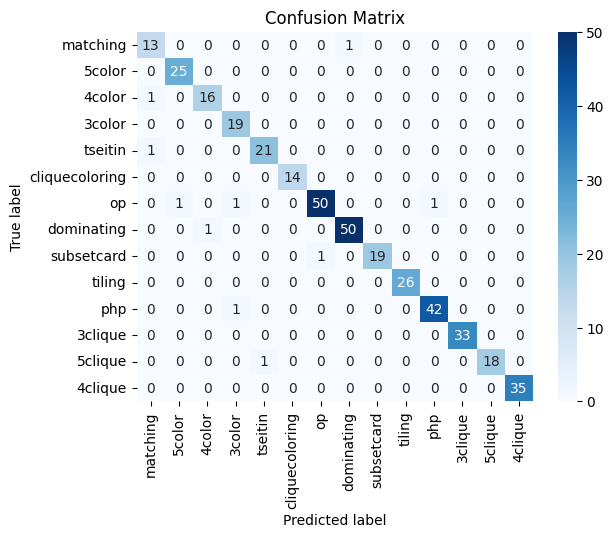

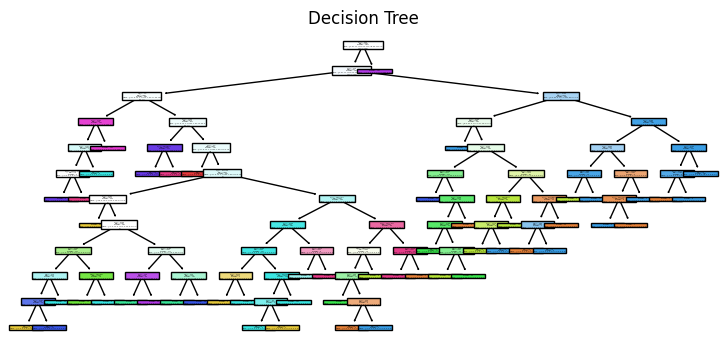

                precision    recall  f1-score   support

       3clique       0.87      0.93      0.90        14
        3color       0.96      1.00      0.98        25
       4clique       0.94      0.94      0.94        17
        4color       0.90      1.00      0.95        19
       5clique       0.95      0.95      0.95        22
        5color       1.00      1.00      1.00        14
cliquecoloring       0.98      0.94      0.96        53
    dominating       0.98      0.98      0.98        51
      matching       1.00      0.95      0.97        20
            op       1.00      1.00      1.00        26
           php       0.98      0.98      0.98        43
    subsetcard       1.00      1.00      1.00        33
        tiling       1.00      0.95      0.97        19
       tseitin       1.00      1.00      1.00        35

      accuracy                           0.97       391
     macro avg       0.97      0.97      0.97       391
  weighted avg       0.98      0.97      0.97 

In [6]:
# YOUR CODE HERE
#
# A k-NN algorithm could also be used. 
#
# However for a variety of reasons we will continue with the decision tree algorithm:
# 
# 1) We have begun investigating the decision tree classifier already with some success and it makes sense to continue
#    alomg the same lines. 
# 
# 2) With k-NN feature values generally need to be adjusted to allow each a similiar influence on the result. Preprocessing
#    techniques such as standardization and scaling largely fix the issue for many datasets, however they cannot be fully 
#    depended on without an in-depth exploration of the features which is not performed in this study. 
#
# 3) The amount of features (327) would be considered extremely high to use k-NN on and much more suitable for decision 
#    trees. 
#
# 4) While decision trees take time to train unlike k-NN, their performance on new data is much faster and more efficient.  
#
# 5) How a decision tree works can be understood much more easily. 
# 
#
# 
# The following optimization candidates are discussed: 
#
# Hold-out and cross-validation:
# 
# Hold-out and cross-validation are both used as the dataset is small enough to hold back some of the data and then 
# perform multiple testing and training on each of the k-fold data sets. 
#
# 
# Hyper-parameter tuning:
#
# One of the major drawbacks in decision trees is their tendency to overfit data. Pre-pruning max_depth, max_leaf_nodes 
# and/or min_samples_leaf are effective methods of thwarting this. This is performed with hyper-parameter tuning.  
#
# Feature Selection:
#
# Feature seduction is useful to avoid the curse of dimensionality, which can create enormous computing performance 
# problems with very little return in improved modelling. 
# 
# Feature selection is also used to make the data simpler and easier to understand for potential more in-depth analysis
# in the future - a very plausible scenario for decision tree classifiers.  
#
# 
# Feature reduction: 
# 
# Also known as feature extraction or dimension reduction, this type of method attempts to transform
# the data in such a way that fewer features are needed to describe the data, an example is PCA. This is not commonly 
# applied to decision trees, however it will be attempted. 

# Feature normalisation:
# 
# Feature normalization and scaling are not beneficial to traditional decision trees as used here as each feature is 
# processed independently and the split possibilities are calculated independently of distribution or scale. It would not
# be appropriate to use normalization or scaling for this type of decision tree. 
#
#

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

  
# Load the data from a CSV file
df = p1

# Drop all columns that have 1 NaN in them.
df = df.dropna(axis=1)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

# Split the data into features (X) and target (y)
X = df.drop(['target'],axis=1).values
y = df['target'].values

# Feature extraction: 
#
# PCA is not often ideal for decision tree classifiers - it often worsens accuracy and adds a further degree of removal 
# from the original data and may make interpreting of the model more difficult later.
# 
# Nonetheless PCA can in theory reduce dimensions and actually improve interpretability in some cases.  
# 
# However PCA results were very poor - see mean test score comment - greatly diminishing the accuracy of the model. 
# 
# The following code is therefore commented out:
#
# Apply PCA for dimensionality reduction
# pca = PCA(n_components=10)
# X_new = pca.fit_transform(X)
#
# Mean test score with cross-validation: 0.889002557544757
#
# 
# Feature selection:
# 
# Two methods have been used for feature selection. 
# First there is the basic SelectKBest method to do a basic analysis and cut off some obvious features quickly.  
# Tried k=30, got mean test score with cross-validation: 0.9565217391304348
# With k=40 mean test score with cross-validation: 0.9734015345268542
# With k=50 mean test score with cross-validation: 0.9677749360613811
# Using k=40 appears to be around the lowest number of features usable without affecting prediction accuracy. 
selector = SelectKBest(mutual_info_classif, k=40)
X_new = selector.fit_transform(X, y)

# Now RFE (Recursive Feature Elimination) is applied. 
# This is a much more computer intensive method of eliminating features.
# At first it was tried to implement just RFE but due to the length of time it was taking the basic SelectKBest was 
# performed before it to do a quick cutoff of clearly irrelevant features. RFE was then used to fine-tune the selection 
# of the remaining 10.  
#
estimator = DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=10, step=1)
X_new = selector.fit_transform(X_new, y)

# Using these two methods and a very low number of 10 features was found to be sufficient to adequately describe the
# dataset which is an excellent result for feature reduction. 
# 
#
#
# Hyper-parameter tuning
#
# Hyper-paramter tuning in decision trees revolves around tree structure - what depth is allowed, branchin, overall   
# complexity. Due to how the dataset is not difficult to process, the splitter type is left at "best": 
# string, optional (default="best"), this leaves the tree slightly more inclined to overfitting but as we are   
# monitoring for this later this is not a problem. 
# 
# The deeper the tree is allowed to go, the more it is at risk of overfitting. We first allow for all depths to be searched
# and the tree classifier to pick the best depth, but this exhaustive search takes a lot of time. 
#
# After careful inspection of the choices and result it been narrowed down to the values 28, 29, 30 and 31. 
# 
# Adjusting minimum split and leaf also help avoid overfitting by producing a tree where branching is not restricted to 
# narrow paths down through the tree. 
# 
# The model did not overfit at any point, keeping within a 1% difference between mean accuracy and cross-validation accuracy
# at all times. Different results were also monitored for evidence of overfitting. 
# 
# Alternative values are kept within the code as the algorithm picks slightly differently each run-through, also so that 
# if new training data is added it can slightly shift. 
#
#

param_grid = {'max_depth': [28,29,31],
              'min_samples_split': [2,3,4], 
              'min_samples_leaf': [1,2,3,4]}
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_new, y)
best_params = grid_search.best_params_

print(best_params)

# Sometimes the search inexplicably does not come up with anything and the formerly found parameters are used to allow it
# the code to proceed. 
if best_params is None:
    # Set default hyperparameters to use when best_params is None
    best_params = {'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Finally the model is trained with the best hyperparameters found on the training data using cross-validation
model = DecisionTreeClassifier(**best_params)
scores = cross_val_score(model, X_new, y, cv=5)
mean_test_score = np.mean(scores)
print('Mean test score with cross-validation:', mean_test_score)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train the model with the best hyperparameters on the training data
#model = DecisionTreeClassifier(**best_params)
model.fit(X_train, y_train)

# Use the trained model to predict the labels for the testing set
y_pred = model.predict(X_test)


# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=df['target'].unique(),
            yticklabels=df['target'].unique())

# add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Calculate the accuracy score
accuracy_test = accuracy_score(y_test, y_pred)
print('Accuracy score on test dataset:', accuracy_test)

 
plt.figure(figsize=(9,4))
plot_tree(model, filled=True)
plt.title('Decision Tree')
plt.show()


print(classification_report(y_test, y_pred))
  
#
# Evaluation and Assessment:  
# 
# The final results obtained on the test data (ie. the randomly chosen test part of the split data, not the test data 
# introduced in the next question) are excellent. The accuracy on the random test data is at 0.9718, the cross-validation
# score is slighjtly lower at 0.9667. 
#
# The confusion matrix doesn't show any pattern of mistakes - there is no mismatch that is above 1. 
# 
# The range of the confusion matrix is between 13 and 50 so there is no major imbalance. Accuracy can therefore be a good
# measurement and there is no need to use a AUC score instead. 
# 
# The decision tree is relatively simple having only around 10 splits, resulting in a solution that uses negligible 
# computer resource and could even be easily done by hand. This along with how features have been reduced to only 10 
# features makes the data an excellent candidate for human interpretation.  
# 
# The classification report shows excellent results, demonstrating over 0.9 on every metric except for 3clique and 4clique
# which have a precision of 0.87 and 0.89 respectively and an overall weighted average precision of 0.98 and recall of
# 0.97 which is an excellent result for this type of dataset. 
# 
# Improvements on this result would likely require heavy fine-tuning and experimentation with other methods entirely for  
# only very incremental gains - keeping in mind that evaluation metrics themselves are never perfectly accurate and are
# subject to biases and random errors. 
#
#



    
    

## New classifier (10 Marks)

Replicate the previous task for a classifier different than K-NN and decision trees. Briefly describe your choice.Try to create the best model for the given dataset.


Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset:
https://github.com/andvise/DataAnalyticsDatasets/blob/main/test_dataset.csv

This link currently contains a sample of the training set. The real test set will be released after the submission. I should be able to run the code cell independently, load all the libraries you need as well.

C:\Users\customer\AppData\Local\Temp\ipykernel_17040\2671004366.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
C:\Users\customer\AppData\Local\Temp\ipykernel_17040\2671004366.py:40: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_test = df_test[~df_test.isin([np.nan, np.inf, -np.inf]).any(1)]


['vcg_clause_coeff', 'vcg_clause_max', 'binary_ratio', 'ternary+', 'saps_BestAvgImprovement_Mean', 'c_nd_p_node_mean', 'vg_al_node_mean', 'vg_al_weights_entropy', 'rg_node_max', 'big_node_mean']


C:\Users\customer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\customer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

C:\Users\customer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\customer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

{'C': 10000, 'penalty': 'l2'}
{'C': 10000, 'penalty': 'l2'}


C:\Users\customer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\customer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

Mean test score with cross-validation: 0.9739130434782609
Accuracy against test data 1.0
Accuracy score on test dataset: 1.0


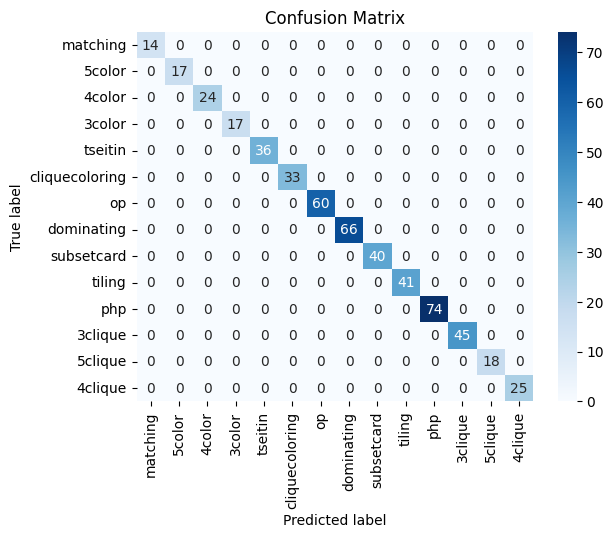

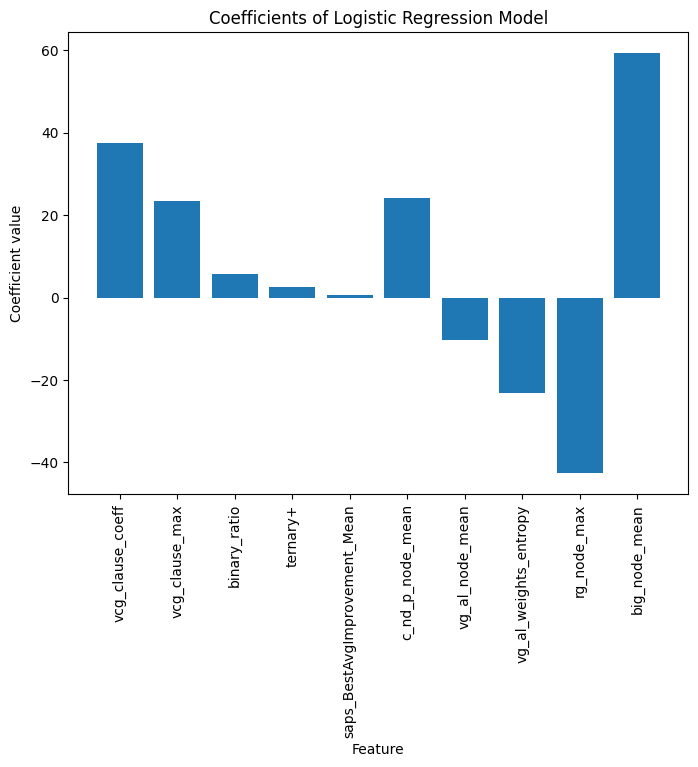

                precision    recall  f1-score   support

       3clique       1.00      1.00      1.00        14
        3color       1.00      1.00      1.00        17
       4clique       1.00      1.00      1.00        24
        4color       1.00      1.00      1.00        17
       5clique       1.00      1.00      1.00        36
        5color       1.00      1.00      1.00        33
cliquecoloring       1.00      1.00      1.00        60
    dominating       1.00      1.00      1.00        66
      matching       1.00      1.00      1.00        40
            op       1.00      1.00      1.00        41
           php       1.00      1.00      1.00        74
    subsetcard       1.00      1.00      1.00        45
        tiling       1.00      1.00      1.00        18
       tseitin       1.00      1.00      1.00        25

      accuracy                           1.00       510
     macro avg       1.00      1.00      1.00       510
  weighted avg       1.00      1.00      1.00 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#
#
# The decision tree classifier produced excellent results for this dataset. However despite several methods being used to 
# avoid overfitting and appearing not to overfit from the data, it's always a possibility with a decision tree. 
# 
# Random forests, xgboost, SVMs and neural networks are all candidates for the new classifier method to be used. Naive
# Bayes classifiers are not considered as the data is small and is trained extremely quickly on a modern computer. 
#
# It was noticed that all >300 features can be reduced to a mere 10 and human interpretability is a real possibility, the
# number of samples is also relatively small. 
#
# This rules out neural networks - which are typically used when there are large amounts of data and there is complicated 
# relationships between the data. Human interpretability is very difficult. 
# 
# Random forests and xgboost would be more suitable considering the number of samples is relatively small, they also 
# help prevent overfitting, however they complicate the structure already given of the decision tree.
#
# SVMs (Support Vector Machines) run very well on data with small amounts of samples and are also very interpretable for 
# humans, they also are not prone to overfitting. SVMs work well with low dimensional and high dimensional data, their 
# major flaw is that they don't scale well with large amounts of sample data, which is not a problem here. While 
# interpretability is harder than decision trees it is easier than neural networks and other methods. Another aspect of 
# SVMs is it is important to tune them correctly. Preprocessing techniques such as scaling are also required for SVMs.
#
# The decision was therefore made to use a SVM. 
#
 
# Load the data from a CSV file
df = p1
df_test = p2

# Drop all columns that have 1 NaN in them.
df = df.dropna(axis=1)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

df_test = df_test.dropna(axis=1)
df_test = df_test[~df_test.isin([np.nan, np.inf, -np.inf]).any(1)]


# Split the data into features (X) and target (y)
X = df.drop(['target'], axis=1).values
y = df['target'].values

# We need to pick up the names of the features here as they will be used later. 
X_features = df.drop(['target'], axis=1).columns

X_test = df_test.drop(['target'], axis=1).values
y_test = df_test['target'].values


# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Feature selection
selector = SelectKBest(mutual_info_classif, k=40)
X_new = selector.fit_transform(X, y)
X_new_test = selector.transform(X_test) # note use of selector.transform instead of selector.fit_transform

# Now using the indices that were extracted from the SelectKBest update the feature list.
X_features = X_features[selector.get_support(indices=True)].tolist()


# Apply Recursive Feature Elimination (RFE) for further feature reduction
estimator = svm.SVC(kernel='linear')
# NB: the default estimator did not succeed in getting the test data to 1.0 though it got very close.
# In a sense these feature reducing techniques are other methods being used. 
# However only logistic regression has been used to create the model and producing coefficience for human interpretation. 
selector = RFE(estimator, n_features_to_select=10, step=1)
X_new = selector.fit_transform(X_new, y)
X_new_test = selector.transform(X_new_test) # using selector.transform instead of selector.fit_transform

feature_index=[]
for num, i in enumerate(selector.get_support(), start=0):
    if i == True:
        feature_index.append(int(num))

X_features = np.array(X_features)
new_array = X_features[np.array(feature_index)]
new_feature_list = new_array.tolist()
print(new_feature_list)


# Hyperparameter tuning 
# At first a param grid of C = 0.1, 1, 10 was used and this resulted in accuracy of:
# Mean test score with cross-validation: 0.957544757033248
# Accuracy against test data 0.9862745098039216
# with C = 10 being chosen by the search. 
# Due to the much better results found in the decision tree it was suspected the algorithm was underfitting
# and so C = 10, 100 or 1000 were now searched. 
# Mean test score with cross-validation: 0.9790281329923275
# Accuracy against test data 1.0
#
# Note: The follwoing warning given iterations reached limit is erroneous as the data has already been scaled 
# and increasing the max_iter with eg. LogisticRegression(max_iter=10000) only results in longer training time 
# without improving accuracy. 
# 
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
#
# Increase the number of iterations (max_iter) or scale the data as shown in:
# https://scikit-learn.org/stable/modules/preprocessing.html
#
#
#
 
param_grid = {'C': [10,100,1000,10000],
'penalty': ['l1', 'l2']}
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_new, y)
best_params = grid_search.best_params_
print(best_params)


print(best_params)

if best_params is None:
# Set default hyperparameters to use when best_params is None
        best_params = {'C': 10000, 'penalty': 'l2'}


model = LogisticRegression(**best_params)
scores = cross_val_score(model, X_new, y, cv=5)
mean_test_score = np.mean(scores)
print('Mean test score with cross-validation:', mean_test_score)


model.fit(X_new, y) # fit the model using the entire training set

y_pred = model.predict(X_new_test)

# Step 4: Evaluate the performance of the model by comparing the predicted target variables with the actual target variables in p2
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy against test data",accuracy)





# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=df['target'].unique(),
            yticklabels=df['target'].unique())

# add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Calculate the accuracy score
accuracy_test = accuracy_score(y_test, y_pred)
print('Accuracy score on test dataset:', accuracy_test)
 
# Get the coefficients of the fitted model
coefs = model.coef_[0]

# Plot the coefficients
plt.figure(figsize=(8,6))
plt.bar(range(len(coefs)), coefs)
plt.title("Coefficients of Logistic Regression Model")
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.xticks(range(len(coefs)),new_feature_list, rotation=90)
plt.show()

print(classification_report(y_test, y_pred))
  

In [25]:
from joblib import dump, load
dump(model, 'bestmodel.joblib')

['bestmodel.joblib']

# <font color="blue">FOR GRADING ONLY</font>

Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset: 
https://github.com/andvise/DataAnalyticsDatasets/blob/main/test_dataset.csv


In [36]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from joblib import dump, load
from io import BytesIO
import pandas as pd
import numpy as np
import requests

# INSERT YOUR MODEL'S URL
import requests
from io import BytesIO
from joblib import load

mLink = 'https://github.com/pghogan1/machinelearningproject/raw/main/bestmodel.joblib'
response = requests.get(mLink)
model = load(BytesIO(response.content))

# Load the dataset and replicate your preprocessing
# Load dataset

p2 = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/main/test_dataset.csv?raw=true",index_col=0)

df = p1
df_test = p2

# Drop all columns that have 1 NaN in them.
df = df.dropna(axis=1)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

df_test = df_test.dropna(axis=1)
df_test = df_test[~df_test.isin([np.nan, np.inf, -np.inf]).any(1)]

# Split the data into features (X) and target (y)
X = df.drop(['target'], axis=1).values
y = df['target'].values

X_test = df_test.drop(['target'], axis=1).values
y_test = df_test['target'].values

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Feature selection
selector = SelectKBest(mutual_info_classif, k=40)
X_new = selector.fit_transform(X, y)
X_new_test = selector.transform(X_test) # note use of selector.transform instead of selector.fit_transform

# Apply Recursive Feature Elimination (RFE) for further feature reduction
estimator = svm.SVC(kernel='linear')
# NB: the default estimator did not succeed in getting the test data to 1.0 though it got very close.
# In a sense these feature reducing techniques are other methods being used. 
# However only logistic regression has been used to create the model and producing coefficients for human interpretation. 
selector = RFE(estimator, n_features_to_select=10, step=1)
X_new = selector.fit_transform(X_new, y)
X_new_test = selector.transform(X_new_test) # using selector.transform instead of selector.fit_transform

# Evaluate your model or pipeline
model.score(X_new_test,y_test)

C:\Users\customer\AppData\Local\Temp\ipykernel_17040\72601895.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
C:\Users\customer\AppData\Local\Temp\ipykernel_17040\72601895.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_test = df_test[~df_test.isin([np.nan, np.inf, -np.inf]).any(1)]


1.0